# Initial Review of the available data sets

This is an initial feasibility study into project MOCAP

## Load Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

## Load Smoking Data Set

This data set should in theory correspond to the following technical paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5745355/ as cited on https://ifestos.cse.sc.edu/databases.php

![image.png](attachment:image.png)

In [2]:
!curl "https://ifestos.cse.sc.edu/datasets/smoking_data.tar.gz" > smoking_data.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  159M  100  159M    0     0  4696k      0  0:00:34  0:00:34 --:--:-- 5986k--:-- --:--:-- --:--:--     0195k      0  0:00:31  0:00:13  0:00:18 5690k0  4980k      0  0:00:32  0:00:17  0:00:15 4540k:00:23  0:00:12 3298k


In [3]:
# File should be 159M compressed, shows 169 in human readable -h option
!ls -lh smoking_data.tar.gz

-rw-r--r--  1 pierrejunca  staff   159M Nov 29 14:33 smoking_data.tar.gz


In [4]:
#Unpack the file, creates sub-directory smoking_data with csv files
!tar -xvf ./smoking_data.tar.gz

x smoking_data/smoking_input.csv
x smoking_data/
x smoking_data/smoking_targets.csv


In [5]:
#Housekeeping delete tar file
!rm smoking_data.tar.gz

In [6]:
#file has no header

X_path = os.path.join('smoking_data','smoking_input.csv')
y_path = os.path.join('smoking_data','smoking_targets.csv')

print(X_path,y_path)

X_data=pd.read_csv(X_path, header=None)
y_data=pd.read_csv(y_path, header=None)

smoking_data/smoking_input.csv smoking_data/smoking_targets.csv


## Data exploration

The data analyzed in this study consisted of the three-dimensional accelerometer data collected from the Asus Zenwatch (first generation). The accelerometer onboard the Asus Zenwatch is triaxial and therefore capable of recording acceleration in three principal axes x, y, and z.

During this investigation, a fixed sampling frequency of 20 Hz was used.

In our data, puff duration never exceeded 5 seconds in length. Therefore, the input to the artificial neural network’s gesture recognition system consisted of a set of accelerometer data that spanned 5 seconds of observation sampled at 20 Hz (100 points of data). Each set of data included x, y, and z components of the accelerometer, which necessitated an artificial neural network architecture with 300 input points and one output point

In [7]:
print(X_data.shape)
X_data.head()

(351530, 300)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,4.8578,4.8555,4.5297,4.10980,3.7406,3.2481,2.96290,2.75890,2.69580,2.183100,2.04270,0.95076,-0.46114,-1.4442,-2.3915,-3.1463,-3.8933,-4.5609,-5.2918,-6.1573,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.8403,-4.4892,-4.4471,-4.11460,-3.5166,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.4862,3.47780,4.11620,4.74010,6.035300,5.4334,NaN,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.71210,-8.88290,-10.25300,-11.34100,-10.12800,-8.35240,-7.84720,-7.46940,-6.65180,-6.12940,-5.68460,-5.45600,-5.781400,-5.792400,-4.706400,-3.70920,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.855900,-1.830200,-1.978700,-1.804800,-1.763400,-1.158000,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.731500,-1.645000,-1.67450,-1.577300,-1.514600,-1.561000,-1.713700,-1.475900,-0.89913,-0.80832,-1.00880,-1.057400,-1.357600,-1.365300,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.052900,-0.296080,-0.932360,-2.593400,-4.680900,-7.31380,-10.14800,-11.48700,-10.09200,-9.10420,-9.85780,-9.61090,-7.96660,-8.00190,-9.38510,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,NaN,5.4516,5.8261,5.7054,6.084800,5.83560,5.4543,4.8956,4.7773,4.5575,4.4064,5.4853,6.4755,7.09080,7.46620,6.94230,6.03590,5.1360,4.0310,3.4324,2.6739,2.0811,2.1131,2.7323,3.6568,3.6922,4.4619,4.1517,4.0064,4.4365,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.5378,3.8537,4.3000,3.8854,2.7031,3.4015,4.3901,4.1783,5.4003,5.7208,5.92460,6.48200,6.3859,5.6793,5.2479,5.5321,5.3164,4.84220,5.3349,4.1253,4.61110,4.97470,4.939100,4.21430,NaN
1,5.3223,5.3131,4.6459,4.25280,3.6366,3.0777,2.63030,2.44620,1.96530,1.460700,-0.28283,-1.64670,-2.78100,-3.5692,-3.7017,-4.1057,-4.4359,-4.6899,-5.0766,-5.7758,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2237,-9.2366,-9.2175,-9.2

In [42]:
X_data.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
351525,-3.1286,-3.1550,-3.1167,-3.1262,-3.1597,-3.1597,-3.0688,-3.1478,-3.1190,-3.1167,-3.1550,-3.1717,-3.1669,-3.1645,-3.1382,-3.2028,-3.1669,-3.1047,-3.1885,-3.1813,-3.2076,-3.8373,-3.1837,-3.1502,-3.1502,-3.2412,-3.1621,-3.1885,-3.1190,-3.2292,-3.1071,-2.9323,-3.0448,-3.1358,-3.1358,-3.1262,-3.1334,-3.1286,-3.1190,-3.1645,-3.1238,-3.2076,-3.2004,-3.1741,-3.2100,-3.3010,-3.2483,-3.2914,-3.1813,-3.1981,-3.2531,-3.2004,-3.2196,-3.2723,-3.2148,-3.1717,-3.2076,-3.1574,-3.1478,-3.2435,-3.3034,-3.2866,-3.2579,-3.3345,-3.2986,-3.1741,-3.2388,-3.2244,-3.3249,-3.1933,-3.1837,-3.2100,-3.2627,-3.2435,-3.2100,-3.1837,-3.2388,-3.2412,-3.2220,-3.2507,-3.2364,-3.2819,-3.2292,-3.2052,-3.2100,-3.2172,-3.3369,-3.0855,-3.1071,-3.2028,-3.3417,-3.2507,-3.2148,-3.3944,-3.4375,-3.4710,-3.4255,-3.2316,-3.3082,-3.3154,-8.9726,-8.9438,-8.9726,-9.0133,-8.9845,-9.0205,-8.9726,-8.9845,-9.0061,-8.9702,-8.9965,-9.0085,-8.9869,-8.9486,-8.9534,-9.0133,-8.9558,-8.9127,-8.9606,-8.9941,-8.9606,-8.8385,-8.9630,-8.9654,-8.9414,-8.7379,-8.7475,-8.6374,-8.6254,-8.8840,-8.5320,-8.8720,-8.5943,-8.5967,-8.8744,-8.8313,-8.7355,-8.8936,-8.7930,-8.8433,-8.7140,-8.6877,-8.8744,-8.8241,-9.1976,-9.1162,-9.0109,-9.0995,-9.0468,-8.9821,-9.0779,-9.0635,-8.9726,-9.0635,-9.0659,-9.0971,-8.8265,-9.0085,-9.0779,-9.0276,-9.0228,-8.9127,-9.0468,-9.1043,-9.1521,-9.0779,-9.0564,-8.9965,-9.1234,-9.0612,-8.8672,-9.0037,-9.0468,-9.0564,-9.0612,-8.9893,-9.0061,-9.0516,-9.0205,-9.0947,-9.0444,-9.1593,-9.0085,-8.9774,-8.9989,-9.0324,-9.1043,-8.8146,-9.0612,-8.8169,-8.9391,-9.0061,-9.1402,-8.5392,-9.3580,-9.1904,-9.1043,-9.0564,-9.3652,-9.2311,2.6814,2.6766,2.6838,2.7077,2.7125,2.6550,2.8130,2.7316,2.6909,2.6861,2.7316,2.7364,2.7364,2.6287,2.8202,2.7029,2.7939,2.6838,2.6239,2.7652,2.6838,2.3294,2.6981,2.8897,2.8513,3.0788,3.2799,3.4451,3.5026,3.2823,3.6917,3.5265,3.4355,3.5026,3.3206,3.2320,3.1602,3.1051,3.1530,3.1530,3.0309,3.2201,2.9687,2.7723,2.5066,2.4228,2.3150,2.4802,2.4012,2.4683,2.4395,2.3845,2.5018,2.4539,2.4683,2.4778,2.5832,2.5401,2.4922,2.5497,2.5305,2.3486,2.4755,2.1953,2.2624,2.2456,2.1834,2.3725,2.3270,2.2408,2.4587,2.3725,2.4204,2.3988,2.2767,2.3869,2.3725,2.3222,2.3605,2.3007,2.3964,2.3294,2.4252,2.4300,2.4659,2.3964,2.3964,2.6383,2.3917,2.4922,2.5808,2.2504,2.1403,2.6550,1.9751,1.7261,1.8841,1.9655,1.7069,1.6926
351526,-3.1550,-3.1167,-3.1262,-3.1597,-3.1597,-3.0688,-3.1478,-3.1190,-3.1167,-3.1550,-3.1717,-3.1669,-3.1645,-3.1382,-3.2028,-3.1669,-3.1047,-3.1885,-3.1813,-3.2076,-3.8373,-3.1837,-3.1502,-3.1502,-3.2412,-3.1621,-3.1885,-3.1190,-3.2292,-3.1071,-2.9323,-3.0448,-3.1358,-3.1358,-3.1262,-3.1334,-3.1286,-3.1190,-3.1645,-3.1238,-3.2076,-3.2004,-3.1741,-3.2100,-3.3010,-3.2483,-3.2914,-3.1813,-3.1981,-3.2531,-3.2004,-3.2196,-3.2723,-3.2148,-3.1717,-3.2076,-3.1574,-3.1478,-3.2435,-3.3034,-3.2866,-3.2579,-3.3345,-3.2986,-3.1741,-3.2388,-3.2244,-3.3249,-3.1933,-3.1837,-3.2100,-3.2627,-3.2435,-3.2100,-3.

In [8]:
X_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,4.8578,4.8555,4.5297,4.10980,3.7406,3.2481,2.96290,2.75890,2.69580,2.183100,2.04270,0.95076,-0.46114,-1.4442,-2.3915,-3.1463,-3.8933,-4.5609,-5.2918,-6.1573,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.8403,-4.4892,-4.4471,-4.11460,-3.5166,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.4862,3.47780,4.11620,4.74010,6.035300,5.4334,NaN,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.71210,-8.88290,-10.25300,-11.34100,-10.12800,-8.35240,-7.84720,-7.46940,-6.65180,-6.12940,-5.68460,-5.45600,-5.781400,-5.792400,-4.706400,-3.70920,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.855900,-1.830200,-1.978700,-1.804800,-1.763400,-1.158000,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.731500,-1.645000,-1.67450,-1.577300,-1.514600,-1.561000,-1.713700,-1.475900,-0.89913,-0.80832,-1.00880,-1.057400,-1.357600,-1.365300,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.052900,-0.296080,-0.932360,-2.593400,-4.680900,-7.31380,-10.14800,-11.48700,-10.09200,-9.10420,-9.85780,-9.61090,-7.96660,-8.00190,-9.38510,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,NaN,5.4516,5.8261,5.7054,6.084800,5.83560,5.4543,4.8956,4.7773,4.5575,4.4064,5.4853,6.4755,7.09080,7.46620,6.94230,6.03590,5.1360,4.0310,3.4324,2.6739,2.0811,2.1131,2.7323,3.6568,3.6922,4.4619,4.1517,4.0064,4.4365,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.5378,3.8537,4.3000,3.8854,2.7031,3.4015,4.3901,4.1783,5.4003,5.7208,5.92460,6.48200,6.3859,5.6793,5.2479,5.5321,5.3164,4.84220,5.3349,4.1253,4.61110,4.97470,4.939100,4.21430,NaN
1,5.3223,5.3131,4.6459,4.25280,3.6366,3.0777,2.63030,2.44620,1.96530,1.460700,-0.28283,-1.64670,-2.78100,-3.5692,-3.7017,-4.1057,-4.4359,-4.6899,-5.0766,-5.7758,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2237,-9.2366,-9.2175,-9.2

In [9]:
X_data.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
           dtype='int64', length=300)

In [10]:
X_data.shape

(351530, 300)

### Rename the target

In [1]:
print(y_data.shape)
y_data.sample(5)

NameError: name 'y_data' is not defined

In [13]:
#Rename y column
y_data.rename(columns={ y_data.columns[0]: "Target" }, inplace = True)  

In [14]:
y_data

,Target
0,1
1,1
2,1
3,1
4,1
...,...
351525,0
351526,0
351527,0
351528,0


Check the balance in classes

In [15]:
y_data.value_counts()

Target
1         177450
0         174080
dtype: int64

### Concatenate the X and the y

In [16]:
df = pd.concat([X_data, y_data], axis=1)

In [17]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,Target
0,4.8578,4.8555,4.5297,4.10980,3.7406,3.2481,2.96290,2.75890,2.69580,2.183100,2.04270,0.95076,-0.46114,-1.4442,-2.3915,-3.1463,-3.8933,-4.5609,-5.2918,-6.1573,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.8403,-4.4892,-4.4471,-4.11460,-3.5166,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.4862,3.47780,4.11620,4.74010,6.035300,5.4334,NaN,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.71210,-8.88290,-10.25300,-11.34100,-10.12800,-8.35240,-7.84720,-7.46940,-6.65180,-6.12940,-5.68460,-5.45600,-5.781400,-5.792400,-4.706400,-3.70920,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.855900,-1.830200,-1.978700,-1.804800,-1.763400,-1.158000,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.731500,-1.645000,-1.67450,-1.577300,-1.514600,-1.561000,-1.713700,-1.475900,-0.89913,-0.80832,-1.00880,-1.057400,-1.357600,-1.365300,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.052900,-0.296080,-0.932360,-2.593400,-4.680900,-7.31380,-10.14800,-11.48700,-10.09200,-9.10420,-9.85780,-9.61090,-7.96660,-8.00190,-9.38510,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,NaN,5.4516,5.8261,5.7054,6.084800,5.83560,5.4543,4.8956,4.7773,4.5575,4.4064,5.4853,6.4755,7.09080,7.46620,6.94230,6.03590,5.1360,4.0310,3.4324,2.6739,2.0811,2.1131,2.7323,3.6568,3.6922,4.4619,4.1517,4.0064,4.4365,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.5378,3.8537,4.3000,3.8854,2.7031,3.4015,4.3901,4.1783,5.4003,5.7208,5.92460,6.48200,6.3859,5.6793,5.2479,5.5321,5.3164,4.84220,5.3349,4.1253,4.61110,4.97470,4.939100,4.21430,NaN,1
1,5.3223,5.3131,4.6459,4.25280,3.6366,3.0777,2.63030,2.44620,1.96530,1.460700,-0.28283,-1.64670,-2.78100,-3.5692,-3.7017,-4.1057,-4.4359,-4.6899,-5.0766,-5.7758,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2237,-9.2366,-9.

### Deal with Nan

In [18]:
#Nan data only present on the last recorded point of the 100 frames
X_data.isnull().sum()

0          0
1          0
2          0
3          0
4          0
       ...  
295        0
296        0
297        0
298        0
299    19950
Length: 300, dtype: int64

create a Dataframe of only Nan

In [19]:
df_nan = df[df.isnull().any(axis=1)]
df_nan

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,Target
0,4.857800,4.855500,4.529700,4.10980,3.740600,3.24810,2.96290,2.75890,2.695800,2.183100,2.04270,0.95076,-0.46114,-1.444200,-2.3915,-3.1463,-3.89330,-4.5609,-5.2918,-6.15730,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.84030,-4.48920,-4.4471,-4.1146,-3.51660,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.48620,3.47780,4.11620,4.74010,6.03530,5.43340,NaN,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.7121,-8.8829,-10.2530,-11.3410,-10.1280,-8.3524,-7.8472,-7.4694,-6.6518,-6.1294,-5.6846,-5.4560,-5.7814,-5.7924,-4.7064,-3.7092,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.85590,-1.83020,-1.97870,-1.80480,-1.76340,-1.15800,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.73150,-1.645000,-1.67450,-1.57730,-1.51460,-1.56100,-1.71370,-1.47590,-0.89913,-0.80832,-1.00880,-1.05740,-1.35760,-1.36530,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.05290,-0.29608,-0.932360,-2.59340,-4.6809,-7.3138,-10.1480,-11.4870,-10.0920,-9.1042,-9.8578,-9.6109,-7.9666,-8.0019,-9.3851,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,NaN,5.4516,5.8261,5.7054,6.0848,5.8356,5.4543,4.89560,4.77730,4.55750,4.40640,5.48530,6.47550,7.090800,7.46620,6.94230,6.03590,5.13600,4.031000,3.43240,2.6739,2.0811,2.1131,2.7323,3.6568,3.69220,4.4619,4.15170,4.00640,4.43650,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.53780,3.85370,4.30000,3.88540,2.703100,3.40150,4.39010,4.17830,5.400300,5.72080,5.92460,6.48200,6.38590,5.679300,5.24790,5.53210,5.31640,4.84220,5.33490,4.125300,4.61110,4.97470,4.939100,4.21430,NaN,1
1,5.322300,5.313100,4.645900,4.25280,3.636600,3.07770,2.63030,2.44620,1.965300,1.460700,-0.28283,-1.64670,-2.78100,-3.569200,-3.7017,-4.1057,-4.43590,-4.6899,-5.0766,-5.77580,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2

In [20]:
Xx_nan=df_nan.iloc[0:,:100]
Xy_nan=df_nan.iloc[0:,100:200]
Xz_nan=df_nan.iloc[0:,200:300]

print(Xx_nan.shape, Xy_nan.shape, Xz_nan.shape)

(19950, 100) (19950, 100) (19950, 100)


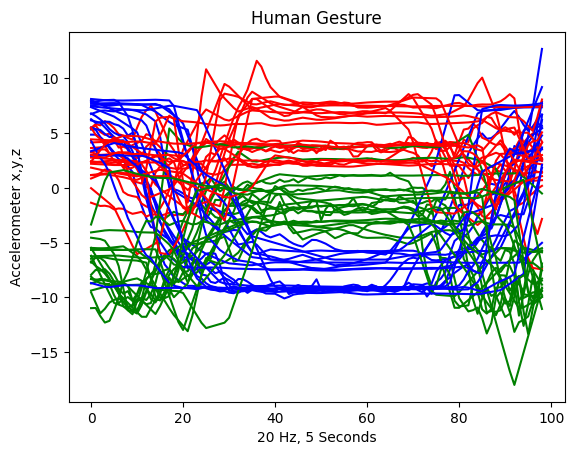

In [21]:
plt.plot(hz,Xx_nan.iloc[i],'b', label="X" )
plt.plot(hz,Xy_nan.iloc[i],'g', label="Y" )
plt.plot(hz,Xz_nan.iloc[i],'r', label="Z" )
#    plt.title("Human Gesture")
#    plt.xlabel("20 Hz, 5 Seconds")
#    plt.ylabel("Accelerometer x,y,z")


**Option 1: There are some NAN values, lets just drop them for now from both the input and target data sets(NOT KEPT)**

In [ ]:
#print(X_data.shape,y_data.shape)

#Create an index List of rows containing NaN values
#nan_rows=np.unique(list(np.where(X_data.isnull())))

#X_data.drop(nan_rows, axis=0, inplace=True)
#y_data.drop(nan_rows, axis=0, inplace=True)

#print(X_data.shape,y_data.shape)

In [ ]:
#X_data.isnull().sum()

In [ ]:
#y_data.value_counts()

**Option 2: Fill Nan with the previous column==> KEPT**

In [22]:
df[299].fillna(df[298], inplace = True)
df[199].fillna(df[198], inplace = True)
df[99].fillna(df[98], inplace = True)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,Target
0,4.8578,4.8555,4.5297,4.10980,3.7406,3.2481,2.96290,2.75890,2.69580,2.183100,2.04270,0.95076,-0.46114,-1.4442,-2.3915,-3.1463,-3.8933,-4.5609,-5.2918,-6.1573,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.8403,-4.4892,-4.4471,-4.11460,-3.5166,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.4862,3.47780,4.11620,4.74010,6.035300,5.4334,5.4334,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.71210,-8.88290,-10.25300,-11.34100,-10.12800,-8.35240,-7.84720,-7.46940,-6.65180,-6.12940,-5.68460,-5.45600,-5.781400,-5.792400,-4.706400,-3.70920,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.855900,-1.830200,-1.978700,-1.804800,-1.763400,-1.158000,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.731500,-1.645000,-1.67450,-1.577300,-1.514600,-1.561000,-1.713700,-1.475900,-0.89913,-0.80832,-1.00880,-1.057400,-1.357600,-1.365300,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.052900,-0.296080,-0.932360,-2.593400,-4.680900,-7.31380,-10.14800,-11.48700,-10.09200,-9.10420,-9.85780,-9.61090,-7.96660,-8.00190,-9.38510,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,-6.9002,5.4516,5.8261,5.7054,6.084800,5.83560,5.4543,4.8956,4.7773,4.5575,4.4064,5.4853,6.4755,7.09080,7.46620,6.94230,6.03590,5.1360,4.0310,3.4324,2.6739,2.0811,2.1131,2.7323,3.6568,3.6922,4.4619,4.1517,4.0064,4.4365,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.5378,3.8537,4.3000,3.8854,2.7031,3.4015,4.3901,4.1783,5.4003,5.7208,5.92460,6.48200,6.3859,5.6793,5.2479,5.5321,5.3164,4.84220,5.3349,4.1253,4.61110,4.97470,4.939100,4.21430,4.21430,1
1,5.3223,5.3131,4.6459,4.25280,3.6366,3.0777,2.63030,2.44620,1.96530,1.460700,-0.28283,-1.64670,-2.78100,-3.5692,-3.7017,-4.1057,-4.4359,-4.6899,-5.0766,-5.7758,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2237,

In [24]:
df.isnull().sum().sum()

0

## Feature Exploration

**Creating a Dataframe of non-smoking gestures**

In [25]:
df_ns = df.loc[df['Target'] == 0]
df_ns

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,Target
177450,2.1045,2.2218,2.0853,2.0446,2.0279,1.9680,2.0135,2.1572,2.5738,2.5211,2.6528,2.7701,2.7749,2.7581,2.7821,2.8132,2.8084,2.7246,2.7246,2.7414,2.8635,2.8826,3.1891,3.4836,3.4955,3.2465,3.1364,3.1292,3.3519,3.3040,3.3782,3.3232,3.2872,3.2992,3.1987,3.1436,3.3088,3.3016,3.4500,3.0670,3.2322,3.0646,3.62720,3.85230,6.25370,3.84510,0.797270,0.648830,-2.276900,-0.737410,-0.086191,-0.80206,-1.25460,-0.33998,-0.71347,-1.30960,-0.34955,-0.87867,-0.85473,0.615310,-0.373500,-0.488420,-0.802060,-0.031125,-0.40462,-0.20590,-1.07500,-0.28730,0.44293,-0.72784,-0.95529,-3.52190,0.97444,-0.49321,-0.35674,-6.7277,-6.4500,-7.2089,-6.6990,-6.8019,-6.8307,-6.8187,-6.8666,-7.0749,-7.2065,-7.4005,-7.3670,-7.1970,-7.2496,-7.0868,-7.1730,-7.2808,-7.6064,-7.4412,-7.3023,-7.7764,-7.5537,-7.5705,-7.5441,-7.6447,2.3080,1.9130,1.9800,1.6017,2.0351,2.1763,2.2745,2.5762,2.4995,2.1045,2.0470,2.0877,2.1907,2.1691,2.2410,2.0710,2.1763,2.1644,1.9896,2.0063,1.9752,2.01590,1.43890,1.58740,1.30240,0.21787,0.55067,0.9098,1.53470,1.58970,1.49880,1.12530,0.96965,0.84755,0.90022,0.98881,1.1684,1.3527,1.00320,1.21390,1.13960,1.27850,0.44532,0.81163,3.85470,8.52810,8.03970,6.47630,-0.45729,-1.9082,-3.2585,-7.9655,-2.9113,-5.0685,-4.9656,-3.9768,-5.2218,-4.7070,-4.6136,-4.7070,-3.7014,-5.1523,-5.2481,-4.5059,-4.8171,-4.4436,-3.8690,-5.2505,-6.5362,-5.6599,-4.7214,-3.7086,-7.2712,-9.8066,-10.6710,-6.5649,-6.4189,-6.3782,-7.3191,-6.9336,-6.8809,-6.9336,-6.9360,-5.8945,-5.6982,-5.3678,-4.7501,-4.3694,-4.1396,-4.3000,-3.5650,-3.0885,-3.1891,-2.9329,-2.7845,-3.0837,-2.3583,-2.3128,-1.9106,-1.9513,9.3895,9.7989,9.5259,9.0184,9.2482,9.2721,9.3368,8.6018,9.4254,9.1979,9.1429,9.2817,9.1572,8.9346,8.6975,8.8771,9.0567,9.0998,9.0591,8.9992,8.8388,8.5826,9.2889,9.3464,9.5307,9.1596,9.1405,8.9154,8.9274,8.9274,8.9489,9.1309,9.0064,9.0591,9.1333,8.9705,8.9393,8.8627,9.3344,9.0471,9.1596,9.1213,10.0530,10.4050,13.9000,7.8260,6.3297,6.4685,6.5930,8.0176,9.1620,9.6265,8.0631,8.3983,8.5706,9.3727,8.1373,8.1852,8.7191,10.0260,8.2283,8.0296,8.2187,8.5395,8.8340,8.7670,7.9601,7.5292,8.4485,8.4342,7.58180,9.05670,8.27140,2.17810,0.60753,0.11193,1.00740,0.93793,0.63626,0.42318,0.61471,0.3705,0.6195,3.1071,3.3034,3.4375,3.7463,4.2611,4.3856,5.0751,5.1613,5.5013,5.3002,5.2403,5.6210,5.5611,5.6808,5.7503,5.6593,5.8389,0
177451,2.2218,2.0853,2.0446,2.0279,1.9680,2.0135,2.1572,2.5738,2.5211,2.6528,2.7701,2.7749,2.7581,2.7821,2.8132,2.8084,2.7246,2.7246,2.7414,2.8635,2.8826,3.1891,3.4836,3.4955,3.2465,3.1364,3.1292,3.3519,3.3040,3.3782,3.3232,3.2872,3.2992,3.1987,3.1436,3.3088,3.3016,3.4500,3.0670,3.2322,3.0646,3.6272,3.85230,6.25370,3.84510,0.79727,0.648830,-2.276900,-0.737410,-0.086191,-0.802060,-1.25460,-0.33998,-0.71347,-1.30960,-0.34955,-0.87867,-0.85473,0.61531,-0.373500,-0.488420,-0.802060,-0.031125,-0.404620,-0.20590,-1.07500,-0.28730,0.44293,-0.72784,-0.95529,-3.52190,0.97444,-0.49321,-0.35674,-6.72770,-6.4500,

In [28]:
df_ns.shape

(174080, 301)

In [26]:
Xx_ns=df_ns.iloc[0:,:100]
Xy_ns=df_ns.iloc[0:,100:200]
Xz_ns=df_ns.iloc[0:,200:300]

print(Xx_ns.shape, Xy_ns.shape, Xz_ns.shape)

(174080, 100) (174080, 100) (174080, 100)


In [38]:
Xx_ns.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
177450,2.1045,2.2218,2.0853,2.0446,2.0279,1.9680,2.0135,2.1572,2.5738,2.5211,2.6528,2.7701,2.7749,2.7581,2.7821,2.8132,2.8084,2.7246,2.7246,2.7414,2.8635,2.8826,3.1891,3.4836,3.4955,3.2465,3.1364,3.12920,3.35190,3.30400,3.37820,3.323200,3.287200,3.299200,3.198700,3.143600,3.308800,3.301600,3.450000,3.067000,3.232200,3.064600,3.627200,3.852300,6.253700,3.845100,0.797270,0.648830,-2.276900,-0.737410,-0.086191,-0.802060,-1.254600,-0.339980,-0.713470,-1.309600,-0.349550,-0.878670,-0.854730,0.615310,-0.373500,-0.488420,-0.802060,-0.031125,-0.40462,-0.20590,-1.07500,-0.28730,0.44293,-0.72784,-0.95529,-3.52190,0.97444,-0.49321,-0.35674,-6.7277,-6.4500,-7.2089,-6.6990,-6.8019,-6.8307,-6.8187,-6.8666,-7.0749,-7.2065,-7.4005,-7.3670,-7.1970,-7.2496,-7.0868,-7.1730,-7.2808,-7.6064,-7.4412,-7.3023,-7.7764,-7.5537,-7.5705,-7.5441,-7.6447
177451,2.2218,2.0853,2.0446,2.0279,1.9680,2.0135,2.1572,2.5738,2.5211,2.6528,2.7701,2.7749,2.7581,2.7821,2.8132,2.8084,2.7246,2.7246,2.7414,2.8635,2.8826,3.1891,3.4836,3.4955,3.2465,3.1364,3.1292,3.35190,3.30400,3.37820,3.32320,3.287200,3.299200,3.198700,3.143600,3.308800,3.301600,3.450000,3.067000,3.232200,3.064600,3.627200,3.852300,6.253700,3.845100,0.797270,0.648830,-2.276900,-0.737410,-0.086191,-0.802060,-1.254600,-0.339980,-0.713470,-1.309600,-0.349550,-0.878670,-0.854730,0.615310,-0.373500,-0.488420,-0.802060,-0.031125,-0.404620,-0.20590,-1.07500,-0.28730,0.44293,-0.72784,-0.95529,-3.52190,0.97444,-0.49321,-0.35674,-6.72770,-6.4500,-7.2089,-6.6990,-6.8019,-6.8307,-6.8187,-6.8666,-7.0749,-7.2065,-7.4005,-7.3670,-7.1970,-7.2496,-7.0868,-7.1730,-7.2808,-7.6064,-7.4412,-7.3023,-7.7764,-7.5537,-7.5705,-7.5441,-7.6447,-7.4939
177452,2.0853,2.0446,2.0279,1.9680,2.0135,2.1572,2.5738,2.5211,2.6528,2.7701,2.7749,2.7581,2.7821,2.8132,2.8084,2.7246,2.7246,2.7414,2.8635,2.8826,3.1891,3.4836,3.4955,3.2465,3.1364,3.1292,3.3519,3.30400,3.37820,3.32320,3.28720,3.299200,3.198700,3.143600,3.308800,3.301600,3.450000,3.067000,3.232200,3.064600,3.627200,3.852300,6.253700,3.845100,0.797270,0.648830,-2.276900,-0.737410,-0.086191,-0.802060,-1.254600,-0.339980,-0.713470,-1.309600,-0.349550,-0.878670,-0.854730,0.615310,-0.373500,-0.488420,-0.802060,-0.031125,-0.404620,-0.205900,-1.07500,-0.28730,0.44293,-0.72784,-0.95529,-3.52190,0.97444,-0.49321,-0.35674,-6.72770,-6.45000,-7.2089,-6.6990,-6.8019,-6.8307,-6.8187,-6.8666,-7.0749,-7.2065,-7.4005,-7.3670,-7.1970,-7.2496,-7.0868,-7.1730,-7.2808,-7.6064,-7.4412,-7.3023,-7.7764,-7.5537,-7.5705,-7.5441,-7.6447,-7.4939,-7.5848
177453,2.0446,2.0279,1.9680,2.0135,2.1572,2.5738,2.5211,2.6528,2.7701,2.7749,2.7581,2.7821,2.8132,2.8084,2.7246,2.7246,2.7414,2.8635,2.8826,3.1891,3.4836,3.4955,3.2465,3.1364,3.1292,3.3519,3.3040,3.37820,3.32320,3.28720,3.29920,3.198700,3.143600,3.308800,3.301600,3.450000,3.067000,3.232200,3.064600,3.627200,3.852300,6.253700,3.845100,0.797270,0.648830,-2.276900,-0.737410,-0.086191,-0.802060,-1.254600,-0.339980,-0.713470,-1.309600,-0.349550,-0.878670,-0.854730,0.615310,-0.373500,-0.488420,-0.802060,-0.031125,-0.404620,-0.205900,-1.075000,-0.28730,0.44293,-0.72784,-0.95529,-3.52190,0.97444,-0.49321,-0.35674,-6.72770,-6.45000,-7.20890,-6.6990,-6.8019,-6.8307,-6.8187,-6.8666,-7.0749,-7.2065,-7.4005,-7.3670,-7.1970,-7.2496,-7.0868,-7.1730,-7.2808,-7.6064,-7.4412,-7.3023,-7.7764,-7.5537,-7.5705,-7.5441,-7.6447,-7.4939,-7.5848,-7.6830
177454,2.0279,1.9680,2.0135,2.1572,2.5738,2.5211,2.6528,2.7701,2.7749,2.7581,2.7821,2.8132,2.8084,2.7246,2.7246,2.7414,2.8635,2.8826,3.1891,3.4836,3.4955,3.2465,3.1364,3.1292,3.3519,3.3040,3.3782,3.32320,3.28720,3.29920,3.19870,3.143600,3.308800,3.301600,3.450000,3.067000,3.232200,3.064600,3.627200,3.852300,6.253700,3.845100,0.797270,0.648830,-2.276900,

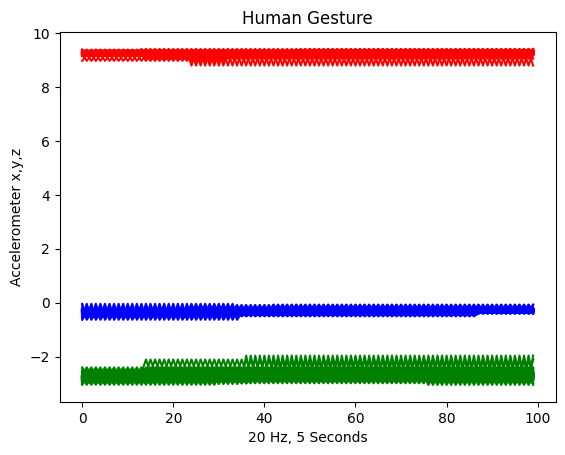

In [46]:
hz=np.arange(0,100)

for i in range (10000, 10100):
    plt.plot(hz,Xx_ns.iloc[i],'b', label="X" )
    plt.plot(hz,Xy_ns.iloc[i],'g', label="Y" )
    plt.plot(hz,Xz_ns.iloc[i],'r', label="Z" )
    plt.title("Human Gesture")
    plt.xlabel("20 Hz, 5 Seconds")
    plt.ylabel("Accelerometer x,y,z")

plt.show;

**Trust but verify**

The observations are for 5 seconds at 20Hz = 100 data points for the 3 acceleromters (100 X 3 = 300 data points). Let's splice the 300 columns/datapoints backing into the individual x,y,z set of data points

In [32]:
Xx=X_data.iloc[0:,:100]
Xy=X_data.iloc[0:,100:200]
Xz=X_data.iloc[0:,200:300]

print(Xx.shape, Xy.shape, Xz.shape)

(351530, 100) (351530, 100) (351530, 100)


Lets create a simple plot for a simple visual comparison of the pattern for the first 5 observations

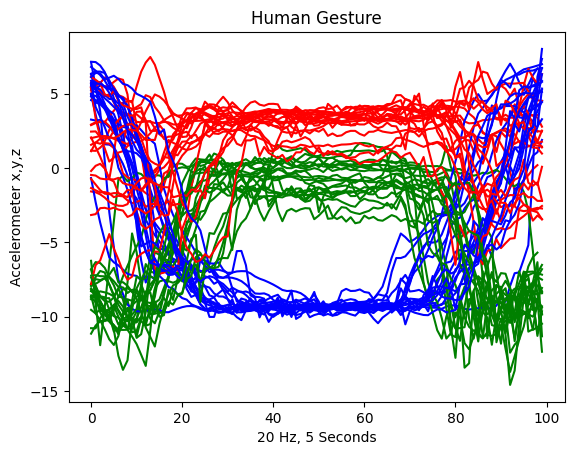

In [33]:
hz=np.arange(0,100)

for i in range (0,20):
    plt.plot(hz,Xx.iloc[i],'b', label="X" )
    plt.plot(hz,Xy.iloc[i],'g', label="Y" )
    plt.plot(hz,Xz.iloc[i],'r', label="Z" )
    plt.title("Human Gesture")
    plt.xlabel("20 Hz, 5 Seconds")
    plt.ylabel("Accelerometer x,y,z")

plt.show;

In [34]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

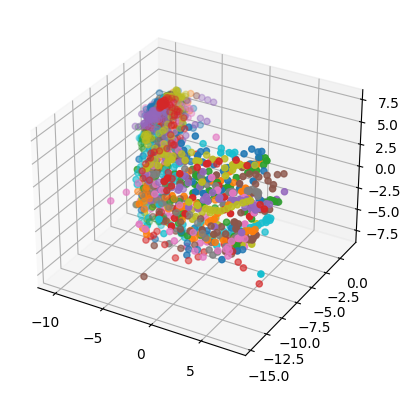

In [36]:


fig = plt.figure()
ax = plt.axes(projection='3d')

hz=np.arange(0,100)

for i in range (0,20):
    ax.scatter3D(Xx.iloc[i], Xy.iloc[i], Xz.iloc[i]);

## Target Exploration